In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [102]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

In [103]:
#PREPROCESSING
xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)
xtrain, xtest = xtrain.astype('float32') / 255.0, xtest.astype('float32') / 255.0
from keras.utils import to_categorical

ytrain=to_categorical(ytrain,num_classes=10)
ytest=to_categorical(ytest,num_classes=10)


In [85]:
#ARCHITECTURE
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=(3,3),padding="same", activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

# Second Conv Block
model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))

# Third Conv Block
model.add(Conv2D(64, kernel_size=(3,3),activation='relu',padding="same"))
model.add(BatchNormalization())

# Flatten + Fully Connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))  # Reduce Dropout
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,802 (1007.04 KB)

 Trainable params: 257,482 (1005.79 KB)

 Non-trainable params: 320 (1.25 KB)

In [86]:
#TRAINING THE MODEL
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max")

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    xtrain, ytrain, 
    validation_data=(xtest, ytest), 
    epochs=10, 
    batch_size=64, 
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.8924 - loss: 0.3744 - val_accuracy: 0.9870 - val_loss: 0.0530
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9785 - loss: 0.0809 - val_accuracy: 0.9866 - val_loss: 0.0572
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9836 - loss: 0.0698 - val_accuracy: 0.9851 - val_loss: 0.0641
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9850 - loss: 0.0613 - val_accuracy: 0.9887 - val_loss: 0.0601


In [105]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0684


[0.05295609310269356, 0.9869999885559082]

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

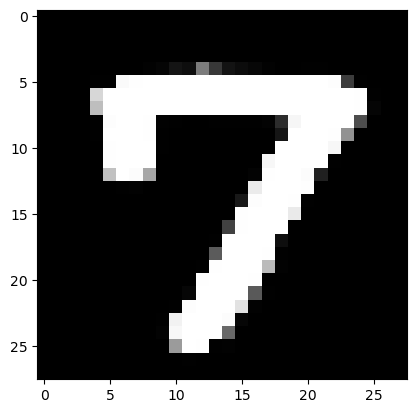

(1, 28, 28, 1)

In [148]:
#PREDICTION TEST WITH ONLINE IMAGES
img = cv2.imread("no7.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28, 28))
img=255-img
plt.imshow(img, cmap="gray")
plt.show()
img=img/255.0
img=img.reshape(1,28,28,1)
img.shape

In [149]:
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Digit: 7


array([[1.0276547e-14, 2.2242021e-11, 3.8241606e-07, 5.9829657e-09,
        1.2779867e-09, 4.5775558e-12, 4.0902255e-14, 9.9999964e-01,
        7.6809323e-09, 1.2080714e-08]], dtype=float32)